## IMPORTING CLEAN DATA & LIBRARIES

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Make the notebook's output stable across runs
np.random.seed(42)

# parallelization : https://towardsdatascience.com/multithreading-and-multiprocessing-in-10-minutes-20d9b3c6a867
from joblib import parallel_backend

# models 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# evaluation
from sklearn import metrics

# parameter tuning 
from sklearn.model_selection import GridSearchCV

# getting the data
%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test

X_train = X_train.toarray()
X_test  = X_test.toarray()
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reducing Number of Datapoints for better model training times
X_train = np.resize(X_train, (100000, 1000))
y_train = np.resize(y_train, (100000,))
X_test  = np.resize(X_test, (42000, 1000))
y_test  = np.resize(y_test, (42000,))

# Note: Still stratified 

In [4]:
# Helper Function for evaluation 
def evaluate(y_test, y_predict, model):
    print("\nMODEL: " + str(model))
    print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))
    print("Precision: ", metrics.precision_score(y_test, y_predict))
    print("Recall: ", metrics.recall_score(y_test, y_predict))
    print("F1 Score: ", metrics.f1_score(y_test, y_predict))

    fpr, tpr, _ = metrics.roc_curve(y_test,  y_predict)
    auc = metrics.roc_auc_score(y_test, y_predict)

    # Plot ROC for this label
    plt.plot(fpr,tpr,label="AUC = "+ "{:.2f}".format(auc))
    
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

## Naive Bayes

Chose Multinomial NB since it works the best for multinomial distribution with discrete features. Infact, the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) mention tf-idf which is what we have applied. 

### DEFAULT

In [63]:
%%time
nb = MultinomialNB()

with parallel_backend('threading'):
    nb.fit(X_train, y_train)

CPU times: user 359 ms, sys: 8.49 ms, total: 367 ms
Wall time: 171 ms



MODEL: Naive Bayes
Accuracy:  0.7206190476190476
Precision:  0.7298112088563804
Recall:  0.7020538176286013
F1 Score:  0.7156634680624212


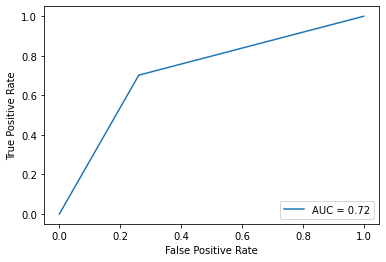

In [64]:
y_predict = nb.predict(X_test)
evaluate(y_test, y_predict, 'Multinomial Naive Bayes')

### PARAMETER TUNING

In [69]:
alpha_vals = []

start = 0.0
while start < 10:
    alpha_vals.append(start)
    start += 0.5

start = 10
while start < 100:
    alpha_vals.append(start)
    start += 10

start = 100
while start <= 1000:
    alpha_vals.append(start)
    start += 100

In [7]:
gridsearch_nb = GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': alpha_vals},
             verbose=1, cv=5, n_jobs=-1)

with parallel_backend('threading'):
    gridsearch_nb.fit(X_train, y_train)
    
print("Best parameters: ", gridsearch_nb.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

## Logistic Regression

### DEFAULT

In [ ]:
%%time
lr = LogisticRegression()

with parallel_backend('threading'):
    lr.fit(X_train, y_train)

CPU times: user 790 ms, sys: 2.26 s, total: 3.05 s
Wall time: 37.3 s

MODEL: Logistic Regression
Accuracy:  0.7328095238095238
Precision:  0.7165430790960452
Recall:  0.7717980412665209
F1 Score:  0.7431448844129092


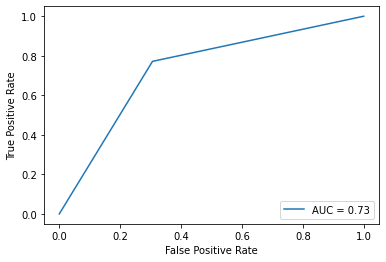

: 

In [ ]:
y_predict = lr.predict(X_test)
evaluate(y_test, y_predict, 'Logistic Regression')

### PARAMETER TUNING

In [ ]:
gridsearch_lr = GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100.0, 10.0, 1.0, 0.1, 0.01], 'solver': ['sag', 'saga', 'liblinear']},
             verbose=1, cv=5, n_jobs=-1)

with parallel_backend('threading'):
    gridsearch_lr.fit(X_train, y_train)
    
print("Best parameters: ", gridsearch_lr.best_params_)

## Long Short Term Memory Model (LSTM)